In [1]:
from os.path import exists
from os import mkdir
import kaggle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans

import pycountry_convert as pc

ModuleNotFoundError: No module named 'pycountry_convert'

# Load Dataset

In [ ]:
# Make sure datasets directory exists
if not exists('../datasets'):
    mkdir('../datasets')

# Download dataset
dataset_path = '../datasets/ocean_personality/IPIP-FFM-data-8Nov2018'
if not exists(dataset_path):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('wine-tunguz/big-five-personality-test', dataset_path, unzip=True)

In [ ]:
# Load dataset
df = pd.read_csv(dataset_path + '/data-final.csv', sep='\t')

# Drop weird numbers
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
original_df = df

# Drop columns with string values
df = df.drop(labels={'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err',
        'EXT1_E', 'EXT2_E', 'EXT3_E',
       'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E',
       'EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E',
       'EST8_E', 'EST9_E', 'EST10_E', 'AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E',
       'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E', 'CSN1_E',
       'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E',
       'CSN9_E', 'CSN10_E', 'OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E',
       'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E'}, axis=1)

df.columns
df.shape

(1012050, 50)

# Principal Component Analysis

In [ ]:
# Scale data befor applying PCA
scaling = StandardScaler()
scaling.fit(df)
scaled_data = scaling.transform(df)

# Run PCA
num_components = min(df.shape)
principal = PCA(n_components=num_components)
principal.fit(scaled_data)
x = principal.transform(scaled_data)
x = pd.DataFrame(x, columns=[f'PC{i+1}' for i in range(num_components)])

# Check the dimensions of data after PCA
print(x.shape)

(1012050, 50)


In [ ]:
def continent_from_country_code(country_code):
    try:
        return pc.country_alpha2_to_continent_code(country_code)
    except KeyError:
        return 'NONE'

def get_continent_color_float(continent_code):
    return codemap[continent_code]


# Add continent column, derived from country column
data_df = df
df = original_df
df['continent'] = df['country'].apply(continent_from_country_code)

# Map continent code string to float for colormap
codemap = {
    code: i / (len(df.continent.unique()) - 1)
    for i, code in enumerate(df.continent.unique())
}

df['continent_float'] = df['continent'].apply(get_continent_color_float)  

print(df.continent.unique())

['EU' 'AS' 'AF' 'NA' 'OC' 'SA' 'NONE']


Select a target and run the below cells to see visualization

In [ ]:
print(' | '.join(df.columns.values))
target = 'continent_float'

EXT1 | EXT2 | EXT3 | EXT4 | EXT5 | EXT6 | EXT7 | EXT8 | EXT9 | EXT10 | EST1 | EST2 | EST3 | EST4 | EST5 | EST6 | EST7 | EST8 | EST9 | EST10 | AGR1 | AGR2 | AGR3 | AGR4 | AGR5 | AGR6 | AGR7 | AGR8 | AGR9 | AGR10 | CSN1 | CSN2 | CSN3 | CSN4 | CSN5 | CSN6 | CSN7 | CSN8 | CSN9 | CSN10 | OPN1 | OPN2 | OPN3 | OPN4 | OPN5 | OPN6 | OPN7 | OPN8 | OPN9 | OPN10 | EXT1_E | EXT2_E | EXT3_E | EXT4_E | EXT5_E | EXT6_E | EXT7_E | EXT8_E | EXT9_E | EXT10_E | EST1_E | EST2_E | EST3_E | EST4_E | EST5_E | EST6_E | EST7_E | EST8_E | EST9_E | EST10_E | AGR1_E | AGR2_E | AGR3_E | AGR4_E | AGR5_E | AGR6_E | AGR7_E | AGR8_E | AGR9_E | AGR10_E | CSN1_E | CSN2_E | CSN3_E | CSN4_E | CSN5_E | CSN6_E | CSN7_E | CSN8_E | CSN9_E | CSN10_E | OPN1_E | OPN2_E | OPN3_E | OPN4_E | OPN5_E | OPN6_E | OPN7_E | OPN8_E | OPN9_E | OPN10_E | dateload | screenw | screenh | introelapse | testelapse | endelapse | IPC | country | lat_appx_lots_of_err | long_appx_lots_of_err | continent | continent_float


Text(0, 0.5, 'PC2')

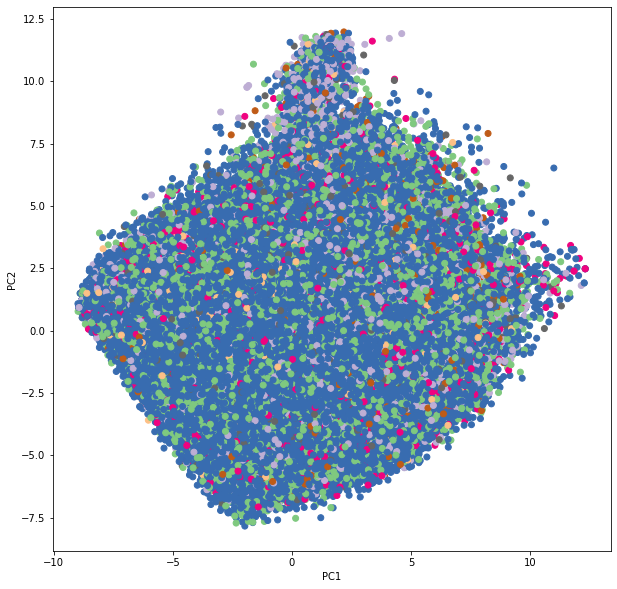

In [ ]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(x['PC1'], x['PC2'], c=df[target], cmap='Accent')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0.5, 0, 'PC3')

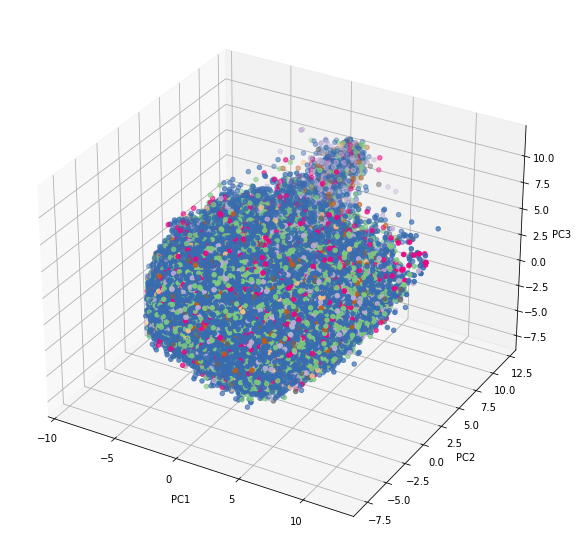

In [ ]:
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(x['PC1'], x['PC2'], x['PC3'], c=df[target], cmap='Accent')
axis.set_xlabel('PC1', fontsize=10)
axis.set_ylabel('PC2', fontsize=10)
axis.set_zlabel('PC3', fontsize=10)

Text(0, 0.5, 'Variance Ratio (%)')

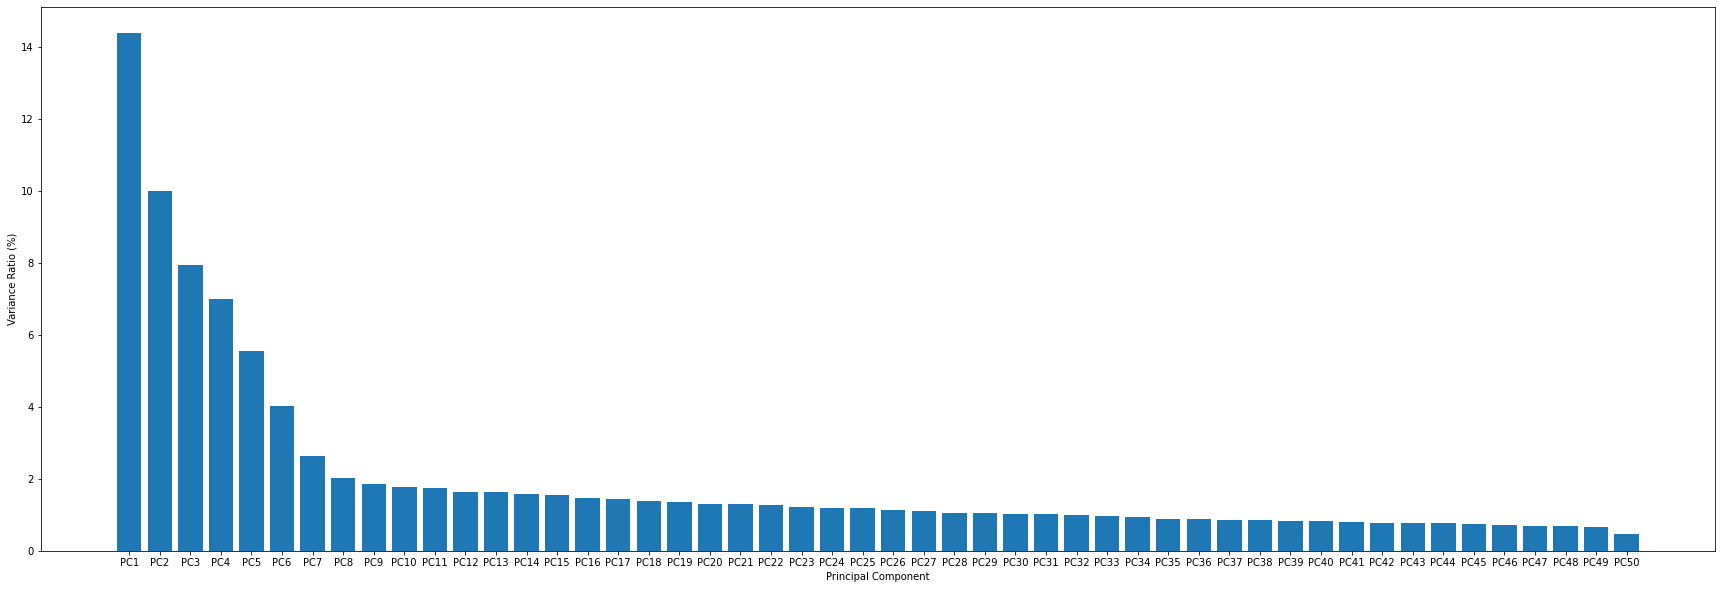

In [ ]:
plt.figure(figsize=(30, 10))
plt.bar(x=x.columns.values, height=[100 * i for i in principal.explained_variance_ratio_])
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio (%)')

# Agglomerative Clustering

[Source](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data_df)

plt.figure(figsize=(10, 10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.show()

MemoryError: Unable to allocate 3.73 TiB for an array with shape (512122095225,) and data type float64

# K-Means

[Source](https://thatascience.com/learn-machine-learning/k-means/)

In [ ]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(data_df)

In [ ]:
loadings = pd.DataFrame(principal.components_.T, columns=x.columns.values, index=data_df.columns.values)
# loadings

Text(0, 0.5, 'PC2')

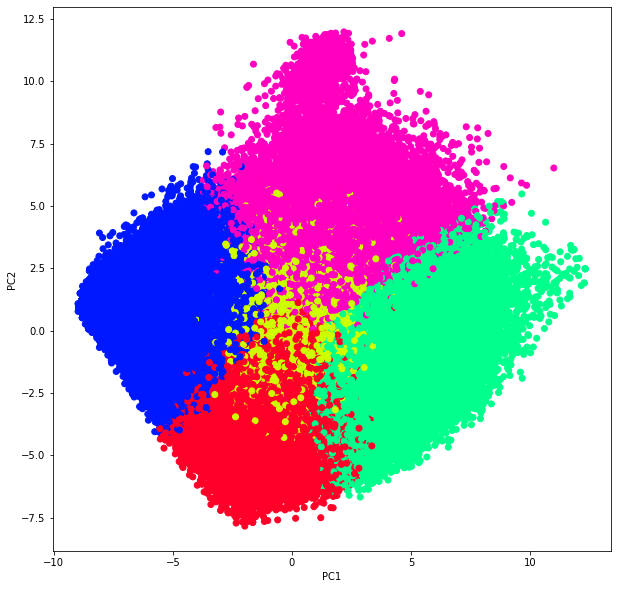

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(x['PC1'], x['PC2'], c=clusters, cmap='gist_rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')

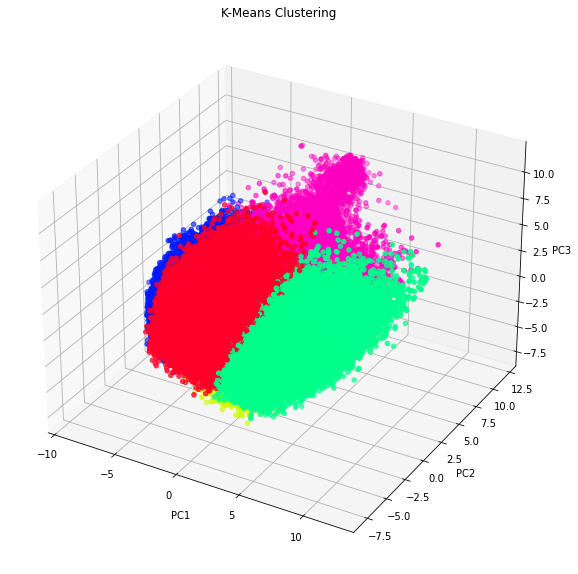

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x['PC1'], x['PC2'], x['PC3'], c=clusters, cmap='gist_rainbow')

ax.set_title('K-Means Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()